##### Imports

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'svg'

##### FIFA World Cup Datasets

In [2]:
df_ogs = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - World Cup Summary.csv')
df_ogs.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [3]:
df_2018 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 2018.csv', index_col='Position')
df_2018.head()


,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,France,7,6,1,0,14,6,8,19
2,Croatia,7,4,2,1,14,9,5,14
3,Belgium,7,6,0,1,16,6,10,18
4,England,7,3,1,3,12,8,4,10
5,Uruguay,5,4,0,1,7,3,4,12


In [4]:
df_2014 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 2014.csv', index_col='Position')
df_2014.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Germany,7,6,1,0,18,4,14,19
2,Argentina,7,5,1,1,8,4,4,16
3,Netherlands,7,5,2,0,15,4,11,17
4,Brazil,7,3,2,2,11,14,−3,11
5,Colombia,5,4,0,1,12,4,8,12


In [5]:
df_2010 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 2010.csv', index_col='Position')
df_2010.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Spain,7,6,0,1,8,2,6,18
2,Netherlands,7,6,0,1,12,6,6,18
3,Germany,7,5,0,2,16,5,11,15
4,Uruguay,7,3,2,2,11,8,3,11
5,Argentina,5,4,0,1,10,6,4,12


In [6]:
df_2006 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 2006.csv', index_col='Position')
df_2006.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Italy,7,5,2,0,12,2,10,17
2,France,7,4,3,0,9,3,6,15
3,Germany,7,5,1,1,14,6,8,16
4,Portugal,7,4,1,2,7,5,2,13
5,Brazil,5,4,0,1,10,2,8,12


In [7]:
df_2002 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 2002.csv', index_col='Position')
df_2002.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Brazil,7,7,0,0,18,4,14,21
2,Germany,7,5,1,1,14,3,11,16
3,Turkey,7,4,1,2,10,6,4,13
4,South Korea,7,3,2,2,8,6,2,11
5,Spain,5,3,2,0,10,5,5,11


In [8]:
df_1998 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1998.csv', index_col='Position')
df_1998.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,France,7,6,1,0,15,2,13,19
2,Brazil,7,4,1,2,14,10,4,13
3,Croatia,7,5,0,2,11,5,6,15
4,Netherlands,7,3,3,1,13,7,6,12
5,Italy,5,3,2,0,8,3,5,11


In [9]:
df_1994 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1994.csv', index_col='Position')
df_1994.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Brazil,7,5,2,0,11,3,8,17
2,Italy,7,4,2,1,8,5,3,14
3,Sweden,7,3,3,1,15,8,7,12
4,Bulgaria,7,3,1,3,10,11,−1,10
5,Germany,5,3,1,1,9,7,2,10


In [10]:
df_1990 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1990.csv', index_col='Position')
df_1990.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,West Germany,7,5,2,0,15,5,10,12
2,Argentina,7,2,3,2,5,4,1,7
3,Italy,7,6,1,0,10,2,8,13
4,England,7,3,3,1,8,6,2,9
5,Yugoslavia,5,3,1,1,8,6,2,7


In [11]:
df_1986 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1986.csv', index_col='Position')
df_1986.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Argentina,7,6,1,0,14,5,9,13
2,West Germany,7,3,2,2,8,7,1,8
3,France,7,4,2,1,12,6,6,10
4,Belgium,7,2,2,3,12,15,−3,6
5,Brazil,5,4,1,0,10,1,9,9


In [12]:
df_1982 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1982.csv', index_col='Position')
df_1982.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Italy,7,4,3,0,12,6,6,11
2,West Germany,7,3,2,2,12,10,2,8
3,Poland,7,3,3,1,11,5,6,9
4,France,7,3,2,2,16,12,4,8
5,Brazil,5,4,0,1,15,6,9,8


In [13]:
df_1978 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1978.csv', index_col='Position')
df_1978.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Argentina,7,5,1,1,15,4,11,11
2,Netherlands,7,3,2,2,15,10,5,8
3,Brazil,7,4,3,0,10,3,7,11
4,Italy,7,4,1,2,9,6,3,9
5,Poland,6,3,1,2,6,6,0,7


In [14]:
df_1974 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1974.csv', index_col='Position')
df_1974.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,West Germany,7,6,0,1,13,4,9,12
2,Netherlands,7,5,1,1,15,3,12,11
3,Poland,7,6,0,1,16,5,11,12
4,Brazil,7,3,2,2,6,4,2,8
5,Sweden,6,2,2,2,7,6,1,6


In [15]:
df_1970 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1970.csv', index_col='Position')
df_1970.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Brazil,6,6,0,0,19,7,12,12
2,Italy,6,3,2,1,10,8,2,8
3,West Germany,6,5,0,1,17,10,7,10
4,Uruguay,6,2,1,3,4,5,−1,5
5,Soviet Union,4,2,1,1,6,2,4,5


In [16]:
df_1966 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1966.csv', index_col='Position')
df_1966.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,England,6,5,1,0,11,3,8,11
2,West Germany,6,4,1,1,15,6,9,9
3,Portugal,6,5,0,1,17,8,9,10
4,Soviet Union,6,4,0,2,10,6,4,8
5,Argentina,4,2,1,1,4,2,2,5


In [17]:
df_1962 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1962.csv', index_col='Position')
df_1962.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Brazil,6,5,1,0,14,5,9,11
2,Czechoslovakia,6,3,1,2,7,7,0,7
3,Chile,6,4,0,2,10,8,2,8
4,Yugoslavia,6,3,0,3,10,7,3,6
5,Hungary,4,2,1,1,8,3,5,5


In [18]:
df_1958 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1958.csv', index_col='Position')
df_1958.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Brazil,6,5,1,0,16,4,12,11
2,Sweden,6,4,1,1,12,7,5,9
3,France,6,4,0,2,23,15,8,8
4,West Germany,6,2,2,2,12,14,−2,6
5,Wales,5,1,3,1,4,4,0,5


In [19]:
df_1954 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1954.csv', index_col='Position')
df_1954.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,West Germany,6,5,0,1,25,14,11,10
2,Hungary,5,4,0,1,27,10,17,8
3,Austria,5,4,0,1,17,12,5,8
4,Uruguay,5,3,0,2,16,9,7,6
5,Switzerland,4,2,0,2,11,11,0,4


In [20]:
df_1950 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1950.csv', index_col='Position')
df_1950.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Uruguay,4,3,1,0,15,5,10,7
2,Brazil,6,4,1,1,22,6,16,9
3,Sweden,5,2,1,2,11,15,−4,5
4,Spain,6,3,1,2,10,12,−2,7
5,Yugoslavia,3,2,0,1,7,3,4,4


In [21]:
df_1938 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1938.csv', index_col='Position')
df_1938.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Italy,4,4,0,0,11,5,6,8
2,Hungary,4,3,0,1,15,5,10,6
3,Brazil,5,3,1,1,14,11,3,7
4,Sweden,3,1,0,2,11,9,2,2
5,Czechoslovakia,3,1,1,1,5,3,2,3


In [22]:
df_1934 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1934.csv', index_col='Position')
df_1934.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Italy,4,3,1,0,11,3,8,7
2,Czechoslovakia,4,3,0,1,9,6,3,6
3,Germany,4,3,0,1,11,8,3,6
4,Austria,4,2,0,2,7,7,0,4
5,Spain,2,1,1,0,4,2,2,3


In [23]:
df_1930 = pd.read_csv('./datasets/fifa-football-world-cup-dataset/FIFA - 1930.csv', index_col='Position')
df_1930.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Uruguay,4,4,0,0,15,3,12,8
2,Argentina,5,4,0,1,18,9,9,8
3,United States,3,2,0,1,7,6,1,4
4,Yugoslavia,3,2,0,1,7,7,0,4
5,Chile,3,2,0,1,5,3,2,4


##### List Creation

In [24]:
data_list = [df_2018, df_2014, df_2010, df_2006, df_2002, df_1998, df_1994, df_1990, df_1986, df_1982, df_1978, df_1974, df_1970, df_1966, df_1962, df_1958, df_1954, df_1950, df_1938, df_1934, df_1930]

data_list = [x.reset_index() for x in data_list]

In [7]:
# Creating List of Years the World Cup Tournament Took Place
year_list = [x for x in range(1950, 2019, 4)]
year_list.sort(reverse=True)
year_list2 = [y for y in range(1930, 1939, 4)]
year_list2.sort(reverse=True)
year_list.extend(year_list2)

In [26]:
# List of total goals scored and number of participating teams in all world cup tournaments
goals_list = [x['Goals For'].sum() for x in data_list]

teams_list = [x['Team'].count() for x in data_list]

In [27]:
# Top scoring teams in every edition of the FIFA World Cup
top_scoring_teams = [(t['Team'][t['Goals For'] == t['Goals For'].max()]).to_list() for t in data_list]

#### Top-scoring team title win frequency

In [28]:
# Number of times the World Cup winner is also the top scoring team
num_winner_is_top_scorer = sum([(df.iloc[0, 1] in (df['Team'][df['Goals For'] == df['Goals For'].max()]).to_list()) for df in data_list])

num_winner_is_top_scorer

9

In [29]:
num_wc_editions = len(year_list)

# How often the top scoring team is the tournament winner
round((num_winner_is_top_scorer/num_wc_editions * 100), 2)

42.86

Thus far, the winner of the World Cup has been the top scoring team in that edition a total of **9** times out of the 21 editions of the tournement. This makes it a **42.86%** tournament title winrate for the top scoring team, which implies performing best in attack isn't necessarily the best route towards winning the world cup.

#### Host team tournament winrate

In [30]:
# Number of times the host nation wins the World Cup
num_winner_is_host = sum(df_ogs['HOST'] == df_ogs['CHAMPION'])
num_winner_is_host

6

In [31]:
# Percentage title winrate for the host nation
num_winner_is_host/num_wc_editions * 100

28.57142857142857

Of the 21 editions of the competition, the host nation has won it only **6** times, making it **28.57%** host nation winrate. This goes to show that being the host nation doesn't particularly provide an edge in winning the competition. 

#### Total Goals Scored in each World Cup Tournament

In [32]:
# Creating new summary dataframe (df_summary)Teams'])
df_summary = pd.DataFrame(year_list, columns=['Year'])
df_summary['Host(s)'] = list(reversed(df_ogs['HOST'].to_list()))
df_summary['Champion'] = list(reversed(df_ogs['CHAMPION'].to_list()))
df_summary['Runner-Up'] = list(reversed(df_ogs['RUNNER UP'].to_list()))
df_summary['Third Place'] = list(reversed(df_ogs['THIRD PLACE'].to_list()))
df_summary['Number of Teams'] = teams_list
df_summary['Matches Played'] = list(reversed(df_ogs['MATCHES PLAYED'].to_list()))
df_summary['Total Goals Scored'] = goals_list
df_summary['Avg Goals per Game'] = round(
    (df_summary['Total Goals Scored'] / df_summary['Matches Played']), 2
)
df_summary.set_index('Year').head()

,Host(s),Champion,Runner-Up,Third Place,Number of Teams,Matches Played,Total Goals Scored,Avg Goals per Game
Year,,,,,,,,
2018,Russia,France,Croatia,Belgium,32,64,169,2.64
2014,Brazil,Germany,Argentina,Netherlands,32,64,171,2.67
2010,South Africa,Spain,Netherlands,Germany,32,64,145,2.27
2006,Germany,Italy,France,Germany,32,64,147,2.30
2002,"South Korea, Japan",Brazil,Germany,Turkey,32,64,161,2.52


In [33]:
# Sorting by number of goals scored
df_summary = df_summary.sort_values('Total Goals Scored', ascending=False)
df_summary.head()

,Year,Host(s),Champion,Runner-Up,Third Place,Number of Teams,Matches Played,Total Goals Scored,Avg Goals per Game
5,1998,France,France,Brazil,Croatia,32,64,171,2.67
1,2014,Brazil,Germany,Argentina,Netherlands,32,64,171,2.67
0,2018,Russia,France,Croatia,Belgium,32,64,169,2.64
4,2002,"South Korea, Japan",Brazil,Germany,Turkey,32,64,161,2.52
3,2006,Germany,Italy,France,Germany,32,64,147,2.30


In [34]:
df_summary.to_csv('./exported/fifa-world-cup-summary.csv')

Number of Teams that have won the World Cup and how many times

In [35]:
# Number of times each World Cup winner has won the tournament
df_summary_n = df_summary.copy()
df_summary_n['Champion'] = df_summary_n['Champion'].replace(['West Germany', 'Germany'], 'Germany*')
df_champions = df_summary_n[['Champion']].value_counts().to_frame().reset_index()
df_champions.columns = ['Team', 'Number of Titles']
df_champions

,Team,Number of Titles
0,Brazil,5
1,Germany*,4
2,Italy,4
3,Argentina,2
4,France,2
5,Uruguay,2
6,England,1
7,Spain,1


In [36]:
# Total number of world cup champions
df_champions.shape[0]

8

There have been 8 FIFA World Cup winners in total, with **Brazil** having won the tournament the most; a total of **5** times, then Italy and Germany having won 4 (3 won as 'West Germany', and 1 after their reunification).

Uruguay won the inaugural edition of the tournament which they hosted back in 1930, then their last one to date in 1950 hosted by Brazil, which ironically was the first World Cup after the competition had been interrupted by World War 2. 

#### Plots

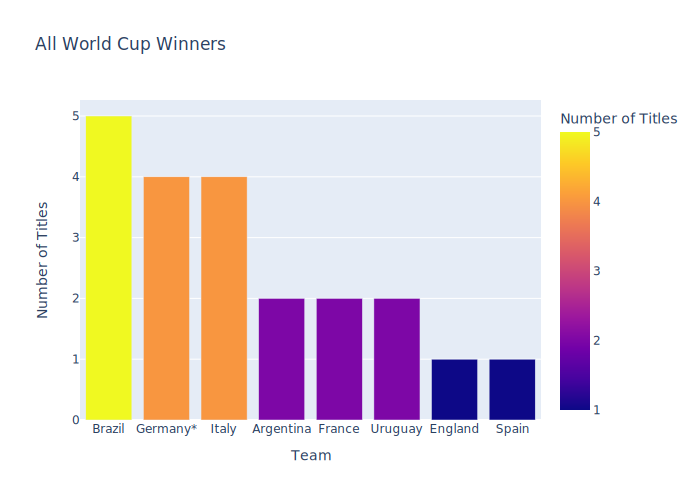

In [37]:
# df_champions['Number of Titles'] = df_champions['Number of Titles'].astype(str)
fig_champions = px.bar(df_champions, x='Team', y='Number of Titles', color='Number of Titles', title='All World Cup Winners')
fig_champions.update_yaxes(tick0=-1)
fig_champions

Text(0, 0.5, 'Total Goals Scored')

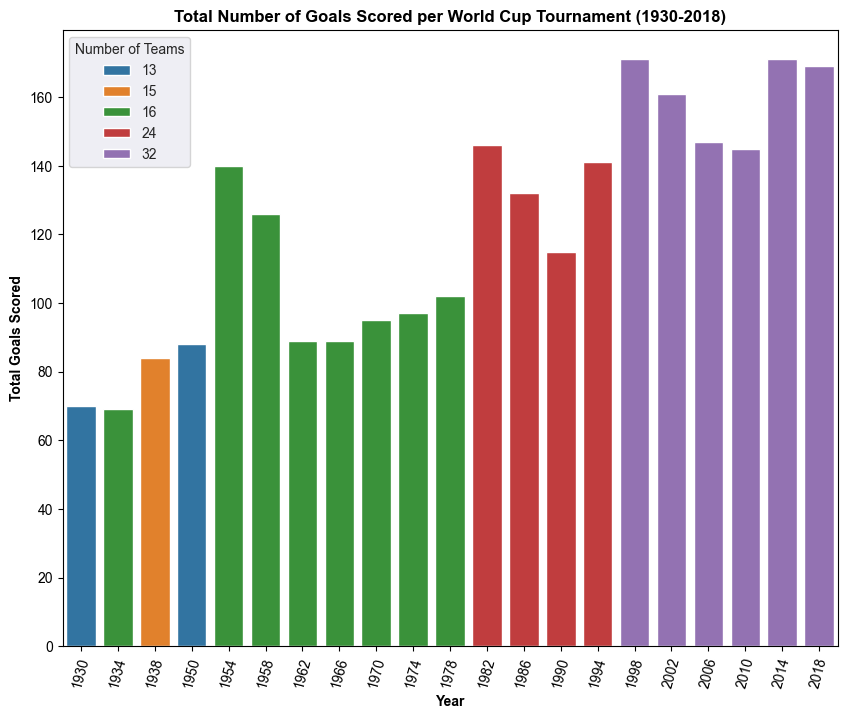

In [38]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=75)
sns.set_style('darkgrid')
sns.barplot(data=df_summary, x='Year', y='Total Goals Scored', hue='Number of Teams', dodge=False)
plt.title('Total Number of Goals Scored per World Cup Tournament (1930-2018)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Goals Scored', fontweight='bold')

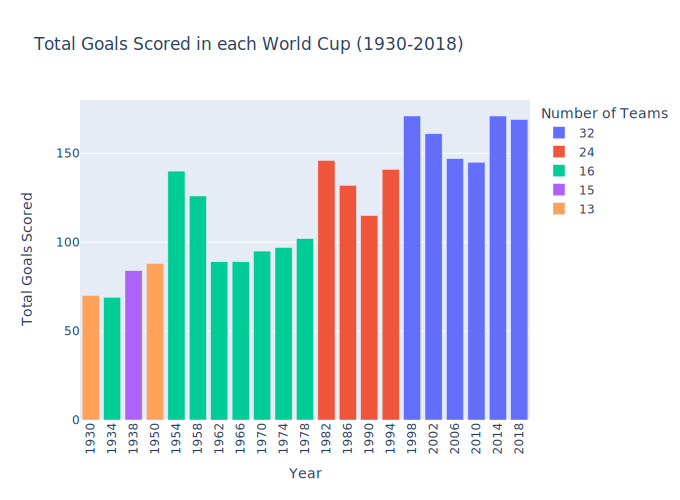

In [39]:
# Alternate plot with Plotly
df_summary_2 = df_summary.copy().sort_values('Number of Teams', ascending=False)
df_summary_2['Number of Teams'] = df_summary_2['Number of Teams'].astype(str)
fig0 = px.bar(df_summary_2, x='Year', y='Total Goals Scored', color='Number of Teams', title='Total Goals Scored in each World Cup (1930-2018)', width=680)
fig0.update_xaxes(type='category', categoryorder='category ascending', tickangle=-90)
fig0

In [40]:
# Average number of goals scored per World Cup edition by given number of participating teams (dict format)
mean_goals_per_team_number_dict = dict([(n, round(df_summary.loc[df_summary['Number of Teams'] == n, 'Total Goals Scored'].mean(), 2)) for n in df_summary.loc[:, 'Number of Teams']])
mean_goals_per_team_number = pd.DataFrame.from_dict(mean_goals_per_team_number_dict.items())
mean_goals_per_team_number.columns = ['Number of Teams', 'Average Number of Goals']
mean_goals_per_team_number = mean_goals_per_team_number.sort_values('Number of Teams', ascending=False)
mean_goals_per_team_number

,Number of Teams,Average Number of Goals
0,32,160.67
1,24,133.50
2,16,100.88
4,15,84.00
3,13,79.00


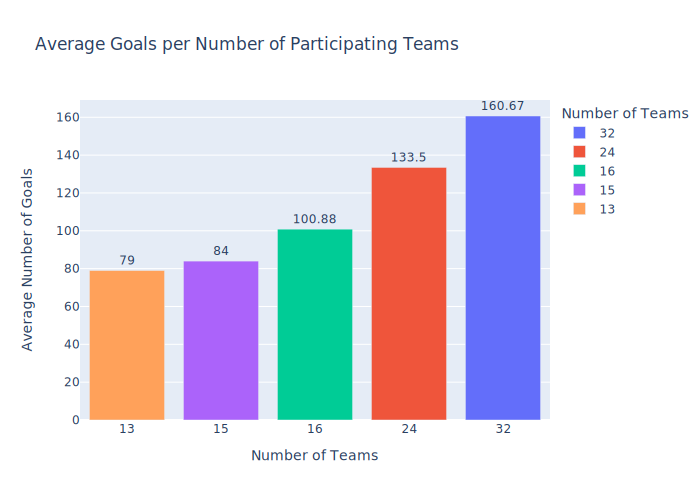

In [41]:
mean_goals_per_team_number['Number of Teams'] = mean_goals_per_team_number['Number of Teams'].astype(str)
fig1 = px.bar(mean_goals_per_team_number, x='Number of Teams', y='Average Number of Goals', color='Number of Teams', text='Average Number of Goals', title='Average Goals per Number of Participating Teams')
fig1.update_xaxes(type='category', categoryorder='category ascending')
fig1.update_traces(textposition="outside")
fig1

On average, the higher the number of participating teams, the higher the number of goals scored in the World Cup. However **1954** and **1958** had an uncharacteristically higher number of goals scored (**140** and **126** respectively) compared to the other editions with the same number of teams (**1930** and **1954-1978**). This is also despite having 2/3 as many teams participating then (16) as in the latter editions of 1982-1994 (24) and just half as many as the editions of 1998-2018 (32).

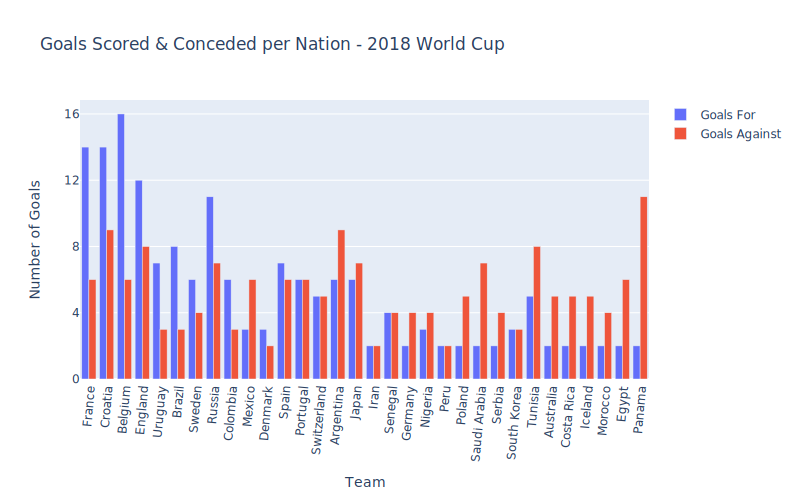

In [42]:
config = dict({'scrollZoom': True})
fig2 = px.bar(df_2018, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 2018 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig2.update_xaxes(tickangle=-85)
fig2.update_yaxes(dtick=4)
fig2

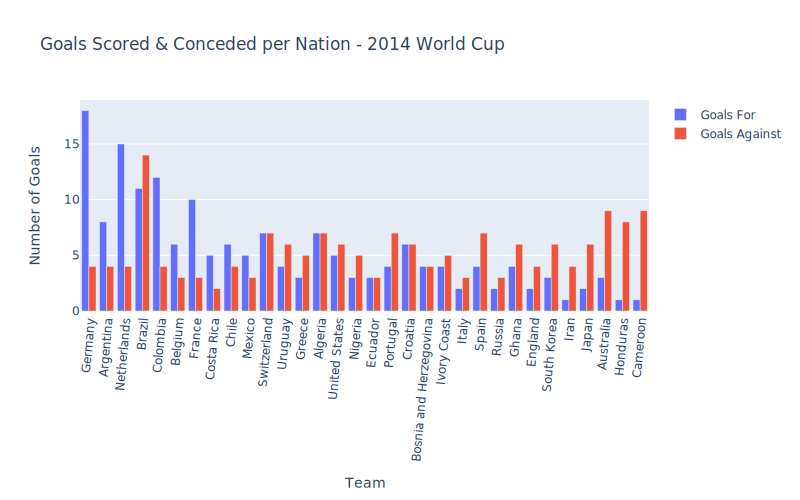

In [43]:
config = dict({'scrollZoom': True})
fig3 = px.bar(df_2014, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 2014 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig3.update_xaxes(tickangle=-85)
fig3

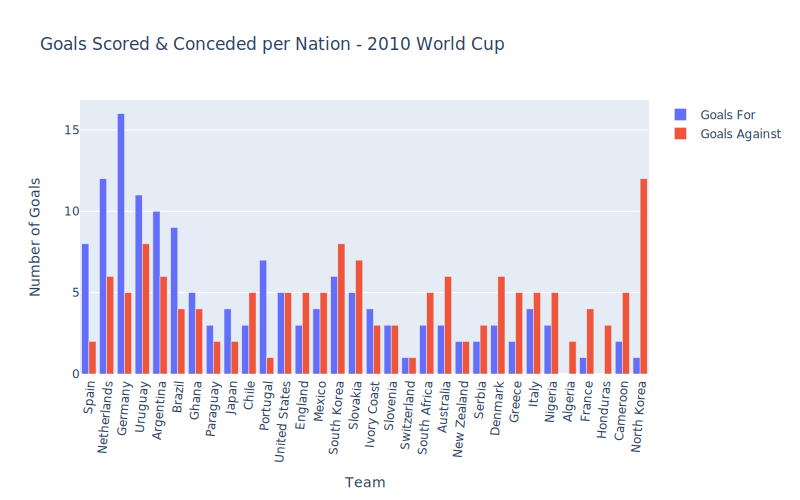

In [44]:
config = dict({'scrollZoom': True})
fig4 = px.bar(df_2010, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 2010 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig4.update_xaxes(tickangle=-85)
fig4

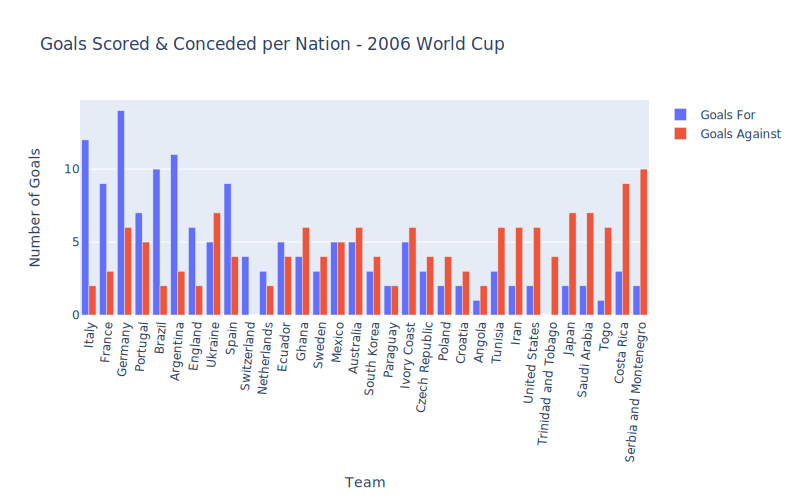

In [45]:
config = dict({'scrollZoom': True})
fig5 = px.bar(df_2006, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 2006 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig5.update_xaxes(tickangle=-85)
fig5

Players complained about the unorthodox behaviour of the Jabulani (official 2010 world cup match ball). So these two plots are to find which team(s) had the most success in scoring goals with said ball.
Interestingly, Germany scored the most goals in the 2010 edition (16), twice as much as the competition winners Spain (8).

However from fig0 it can be noticed that the the 2010 edition of the World Cup had the least goals scored (145) since 1998 (when the number of participating teams was increased to 32), though the previous edition in 2006 had just 2 goals more (147).

It's worth noting that the Teamgeist (official 2006 match ball) was also heavily criticised as it was vastly different from the previous editions (14 curved panels instead of 32 which were bonded rather than stitched). Thus it could explain why there were noticeably fewer goals scored in the 2006 and 2010 competitions in that time range (1998-2018)

In both editions, (2006 and 2010), Germany were the highest scoring team, outscoring eventual winners on both occassions. Perhaps the German team were already accustomed to unorthodox footballs.

Investigating the nature of German league match balls could provide more insight into this observation.

However, before any conclusions are drawn, it must be taken into consideration that numerous factors affect the performance of a football team including but not limited to: quality of the players, tactics employed by the manager, pitch conditions, player form and confidence levels.

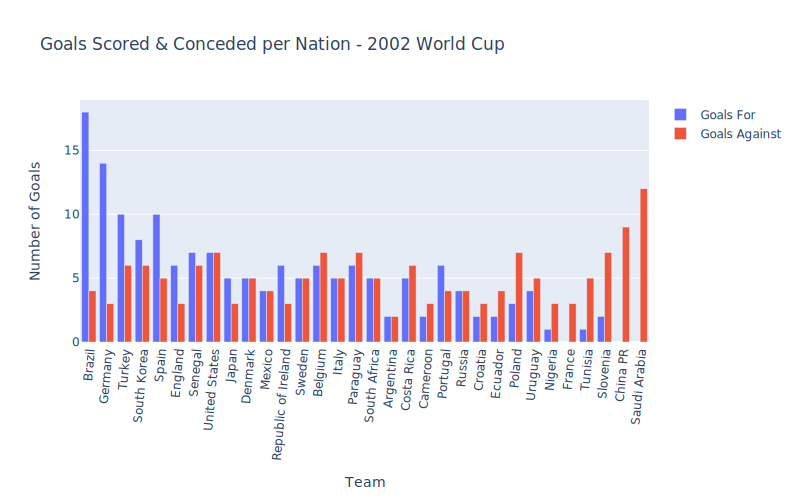

In [46]:
config = dict({'scrollZoom': True})
fig6 = px.bar(df_2002, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 2002 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig6.update_xaxes(tickangle=-85)
fig6

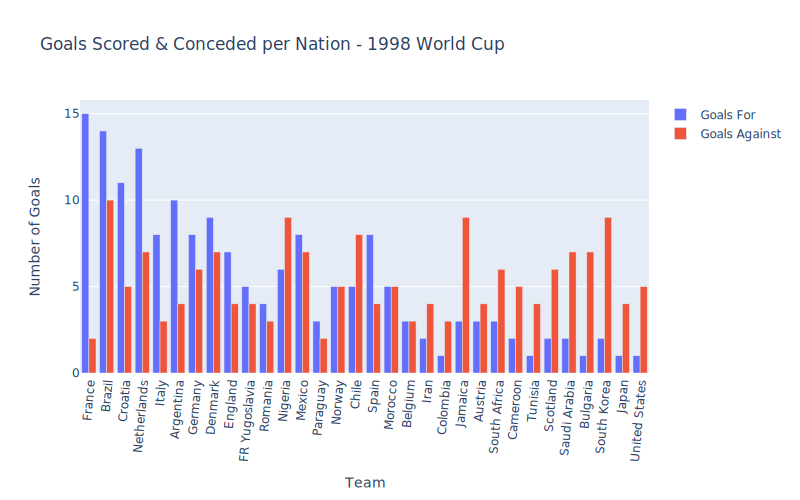

In [47]:
config = dict({'scrollZoom': True})
fig7 = px.bar(df_1998, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1998 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig7.update_xaxes(tickangle=-85)
fig7

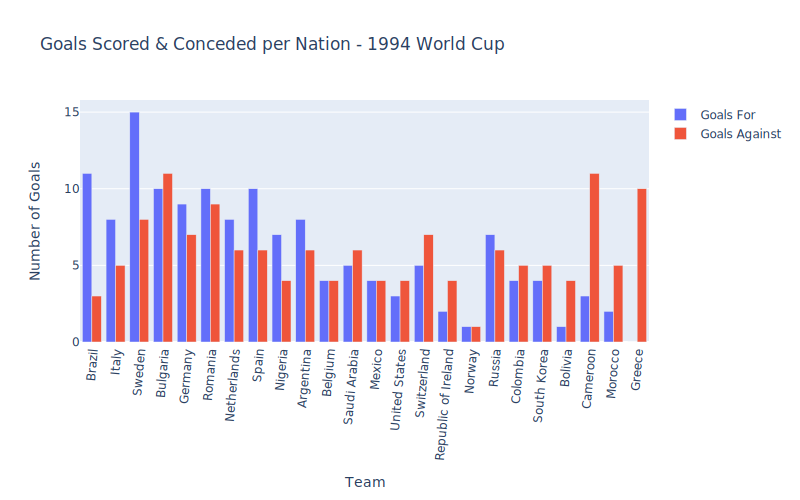

In [48]:
config = dict({'scrollZoom': True})
fig8 = px.bar(df_1994, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1994 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig8.update_xaxes(tickangle=-85)
fig8

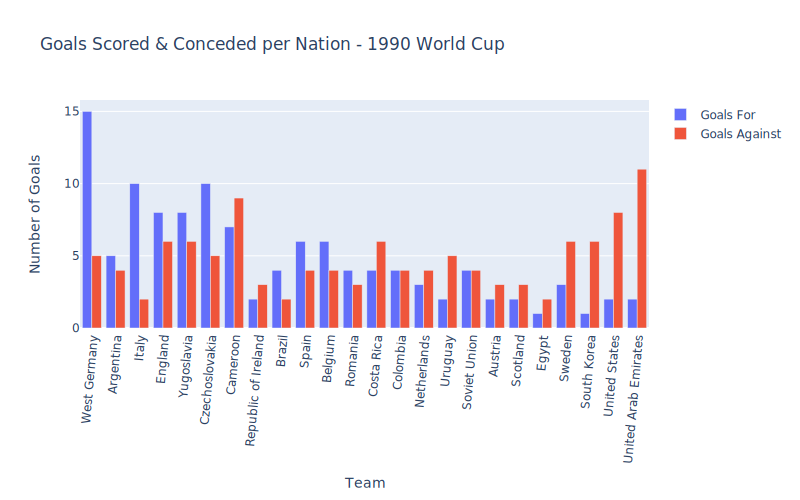

In [49]:
config = dict({'scrollZoom': True})
fig9 = px.bar(df_1990, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1990 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig9.update_xaxes(tickangle=-85)
fig9

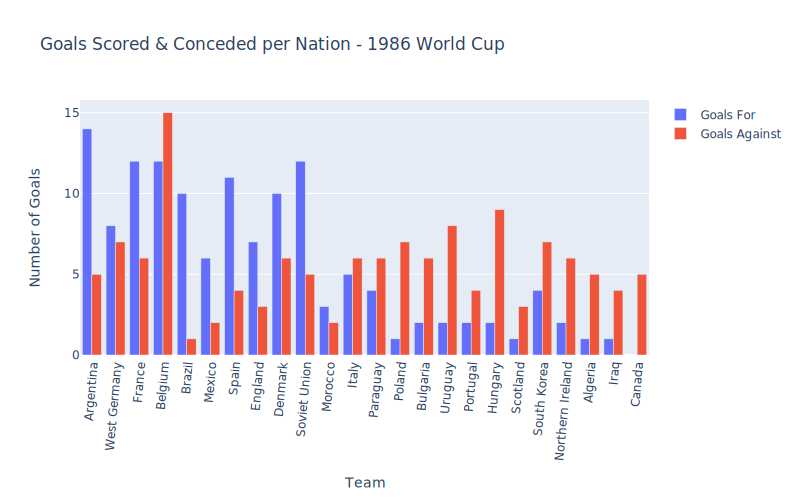

In [50]:
config = dict({'scrollZoom': True})
fig10 = px.bar(df_1986, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1986 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig10.update_xaxes(tickangle=-85)
fig10

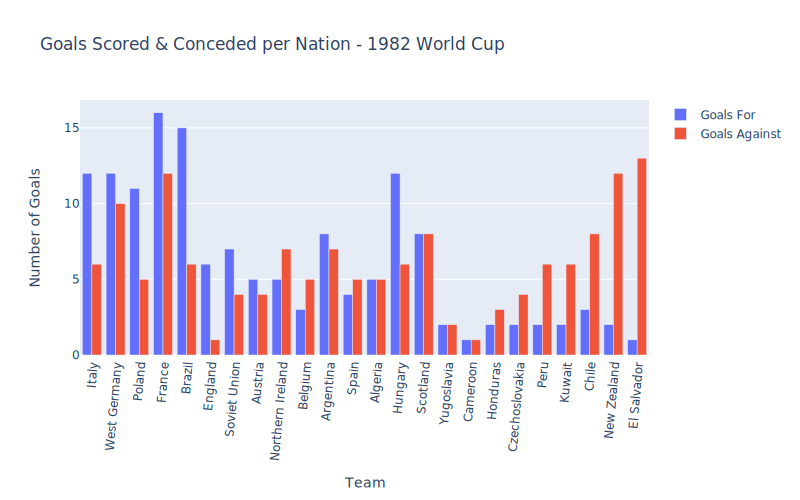

In [51]:
config = dict({'scrollZoom': True})
fig11 = px.bar(df_1982, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1982 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=800)
fig11.update_xaxes(tickangle=-85)
fig11

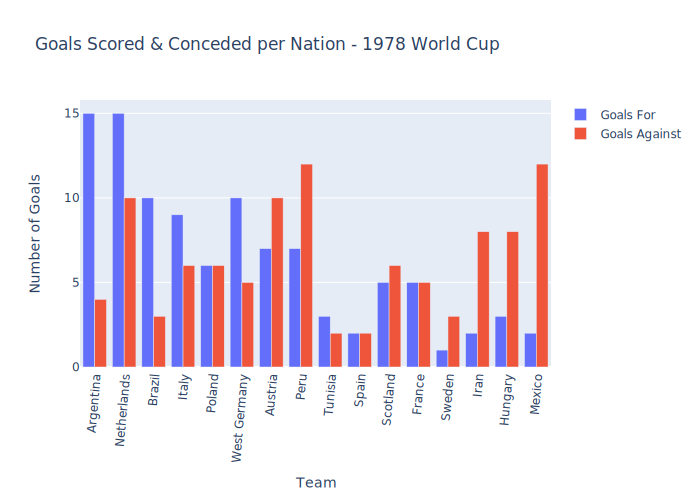

In [52]:
config = dict({'scrollZoom': True})
fig12 = px.bar(df_1978, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1978 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig12.update_xaxes(tickangle=-85)
fig12

In [53]:
df_1978.head()

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Argentina,7,5,1,1,15,4,11,11
2,Netherlands,7,3,2,2,15,10,5,8
3,Brazil,7,4,3,0,10,3,7,11
4,Italy,7,4,1,2,9,6,3,9
5,Poland,6,3,1,2,6,6,0,7


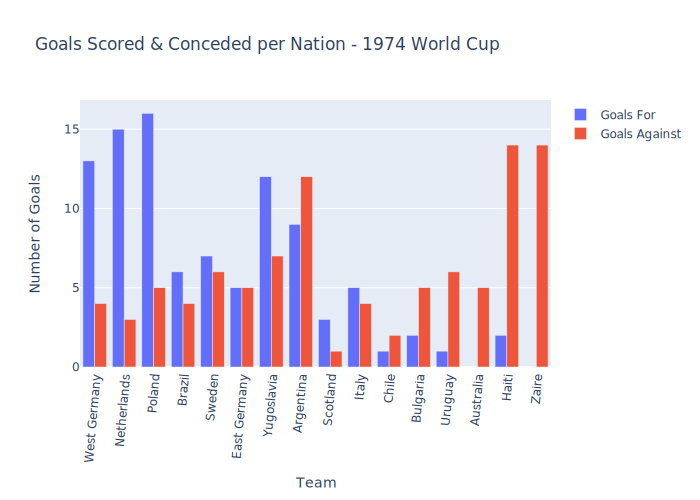

In [54]:
config = dict({'scrollZoom': True})
fig13 = px.bar(df_1974, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1974 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig13.update_xaxes(tickangle=-85)
fig13

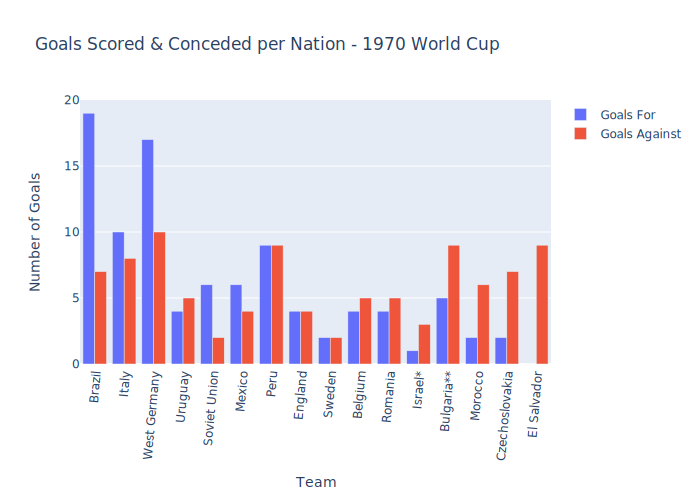

In [55]:
config = dict({'scrollZoom': True})
fig14 = px.bar(df_1970, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1970 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig14.update_xaxes(tickangle=-85)
fig14

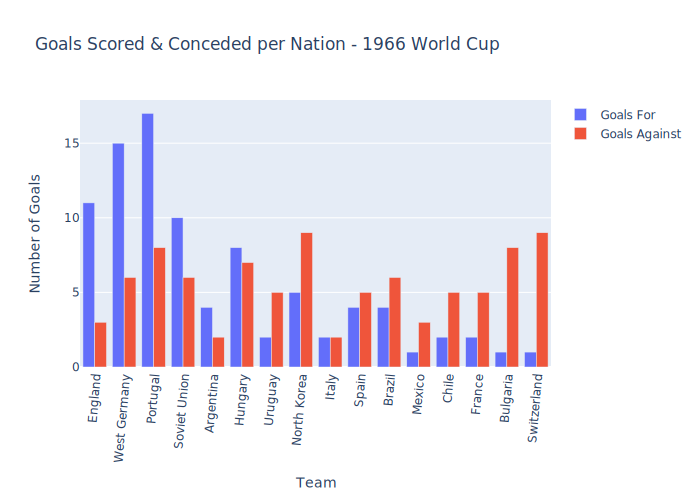

In [56]:
config = dict({'scrollZoom': True})
fig15 = px.bar(df_1966, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1966 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig15.update_xaxes(tickangle=-85)
fig15

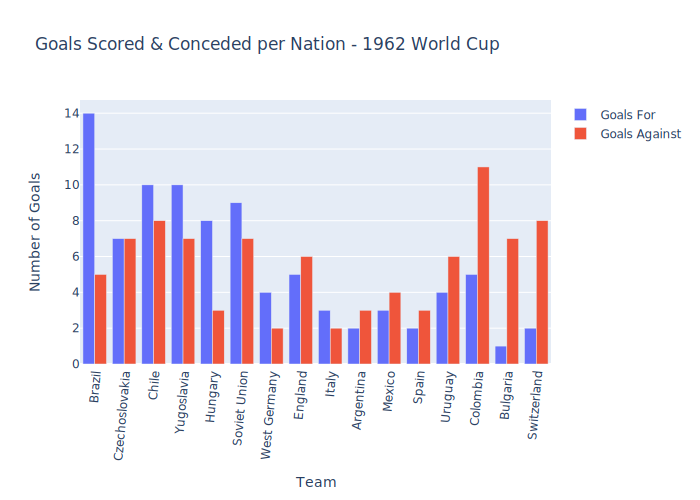

In [57]:
config = dict({'scrollZoom': True})
fig16 = px.bar(df_1962, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1962 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig16.update_xaxes(tickangle=-85)
fig16

In [58]:
# World Cup editions with 16 participating teams arranged by number of goals scored
df_summary.loc[df_summary['Number of Teams'] == 16, ['Year', 'Total Goals Scored']].sort_values('Total Goals Scored', ascending=False)

,Year,Total Goals Scored
16,1954,140
15,1958,126
10,1978,102
11,1974,97
12,1970,95
13,1966,89
14,1962,89
19,1934,69


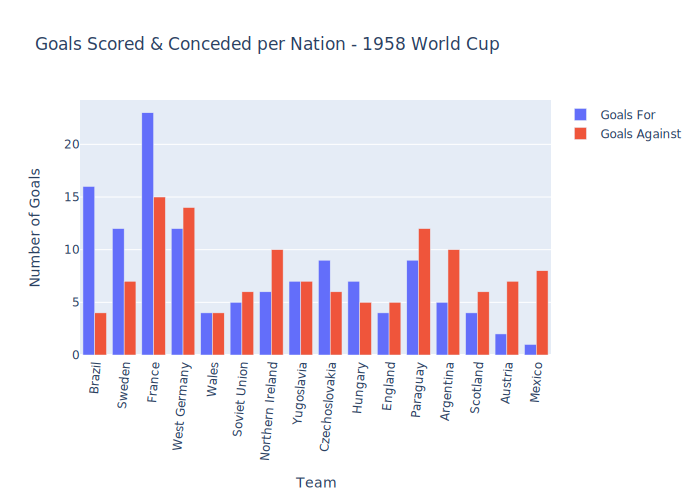

In [59]:
config = dict({'scrollZoom': True})
fig17 = px.bar(df_1958, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1958 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig17.update_xaxes(tickangle=-85)
fig17

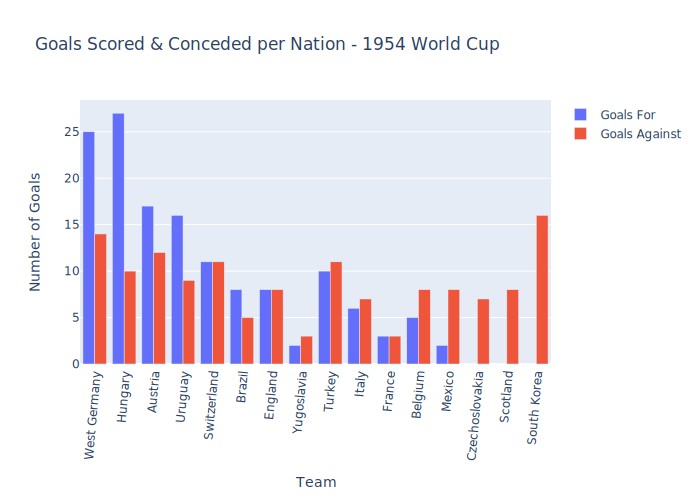

In [60]:
config = dict({'scrollZoom': True})
fig18 = px.bar(df_1954, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1954 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig18.update_xaxes(tickangle=-85)
fig18

As mentioned earlier, the 1954 and 1958 editions of the World Cup had an unusually higher number of goals scored (140 and 126 respectively) compared to the other editions (1934, 1954-1978) with the same number of participating teams (16).

Of the 140 goals scored in the 1954 edition of the World Cup, the top 3 teams - West Germany, Hungary and Austria accounted for just under half (49.29%), scoring a combined 69 goals (25, 27 and 17 respectively).

In the 1958 edition, the top 3 teams Brazil, Sweden and France, scored a combined 51 goals (16, 12 and 23 respectively) accounting for 40.48% (or just over two-fifths) of the 126 goals scored in the tournament.

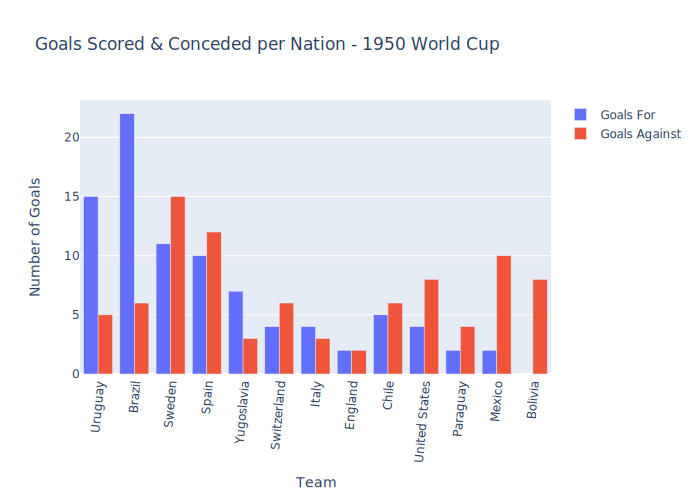

In [61]:
config = dict({'scrollZoom': True})
fig19 = px.bar(df_1950, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1950 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig19.update_xaxes(tickangle=-85)
fig19

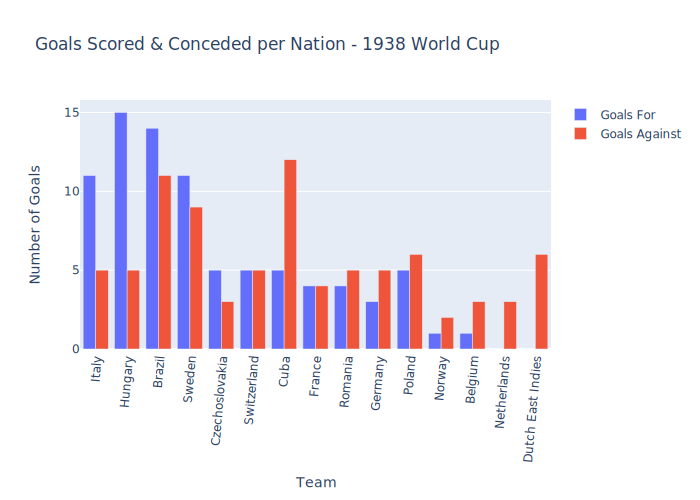

In [62]:
config = dict({'scrollZoom': True})
fig20 = px.bar(df_1938, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1938 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig20.update_xaxes(tickangle=-85)
fig20

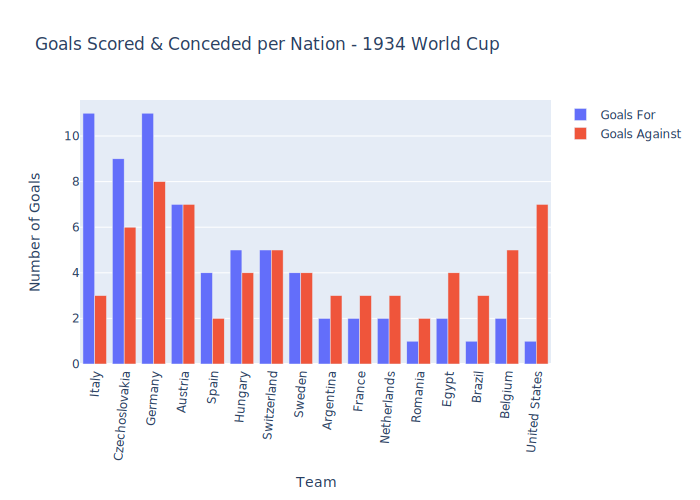

In [63]:
config = dict({'scrollZoom': True})
fig21 = px.bar(df_1934, x='Team', y=['Goals For', 'Goals Against'], title='Goals Scored & Conceded per Nation - 1934 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=700)
fig21.update_xaxes(tickangle=-85)
fig21

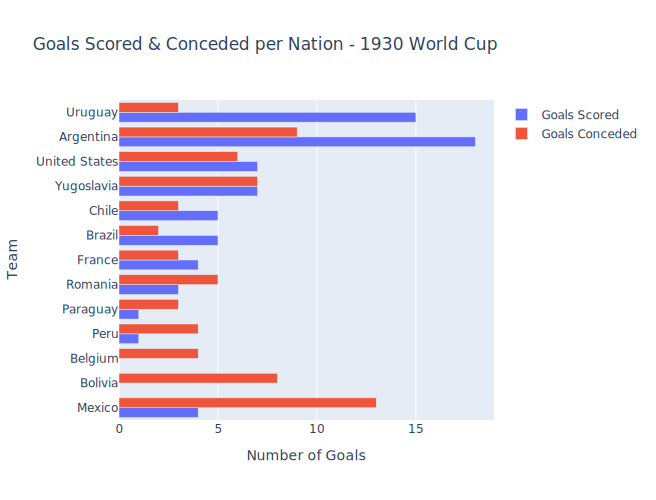

In [ ]:
config = dict({'scrollZoom': True})
fig22 = px.bar(df_1930, y='Team', x=['Goals Scored', 'Goals Conceded'], title='Goals Scored & Conceded per Nation - 1930 World Cup', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=656)
fig22

In [ ]:
# create list of years for dropdown
year_list = sorted([y for y in range(1950, 2019, 4)], reverse=True)
year_list2 = (sorted([y for y in range(1930, 1939, 4)], reverse=True))
year_list.extend(year_list2)

In [ ]:
# dynamically create and render dataframe for selected year
def render_fifa_df(year):
    try:
        df = pd.read_csv(f'datasets/fifa-football-world-cup-dataset/FIFA - {year}.csv', index_col='Position').rename(columns={'Goals For':'Goals Scored', 'Goals Against':'Goals Conceded'})
        
        return df.to_html()
    
    except:
        print(f'Data not found for {year}.\nPlease input a valid FIFA World Cup year up to 2018!')

In [ ]:
# create function to dynamically create bar chart
def create_fifa_bar_chart(year):
    try:
        df = pd.read_csv(f'datasets/fifa-football-world-cup-dataset/FIFA - {year}.csv', index_col='Position').rename(columns={'Goals For':'Goals Scored', 'Goals Against':'Goals Conceded'}).sort_index(ascending=False)
        
        fig = px.bar(df, x=['Goals Conceded', 'Goals Scored'], y='Team', title=f'{year} World Cup Team Perfomance - Goals Scored and Conceded', barmode='group', labels={'Team':'Team', 'value':'Number of Goals', 'variable':''}, width=652, height=920, color_discrete_map={"Goals Scored": "#0082d9", "Goals Conceded": "#c68555"},)
        
        return fig
    
    except FileNotFoundError:
        print(f'Data not found for {year}.\nPlease input a valid FIFA World Cup year up to 2018!')

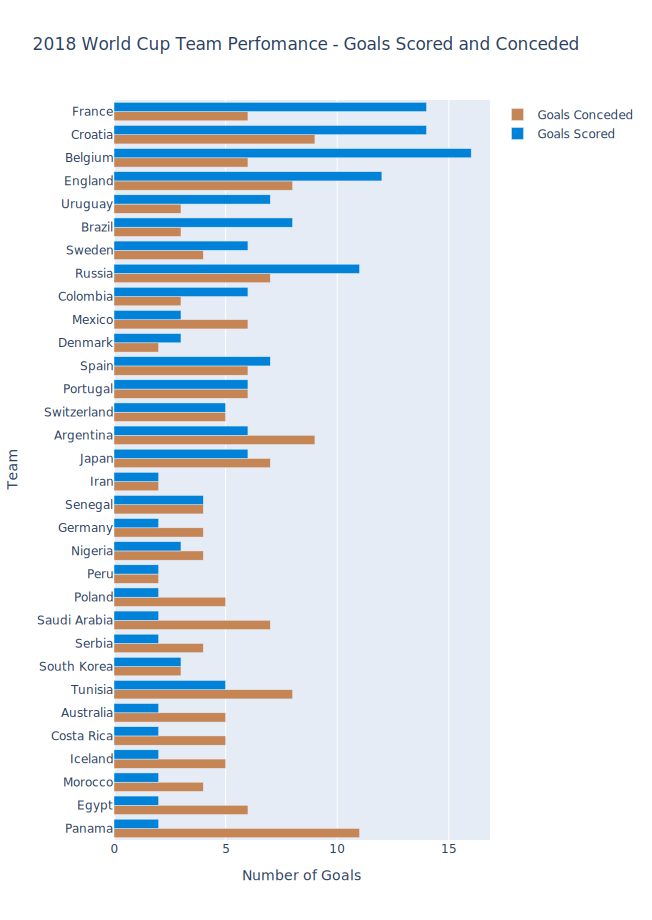

In [75]:
# sample bar chart
create_fifa_bar_chart(2018)